In [18]:
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn.linear_model import Perceptron

cm = 2.4

pd.options.display.max_columns = 250 #Changes the number of columns diplayed (default is 20)
pd.options.display.max_rows = 250 #Changes the number of rows diplayed (default is 60)
pd.options.display.max_colwidth = 250 #Changes the number of characters in a cell so that the contents don't get truncated (default is 50)

/var/folders/gn/kx6xc1f932v5jmzl00v_j81c0000gn/T/ipykernel_7530/3207422171.py:19: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


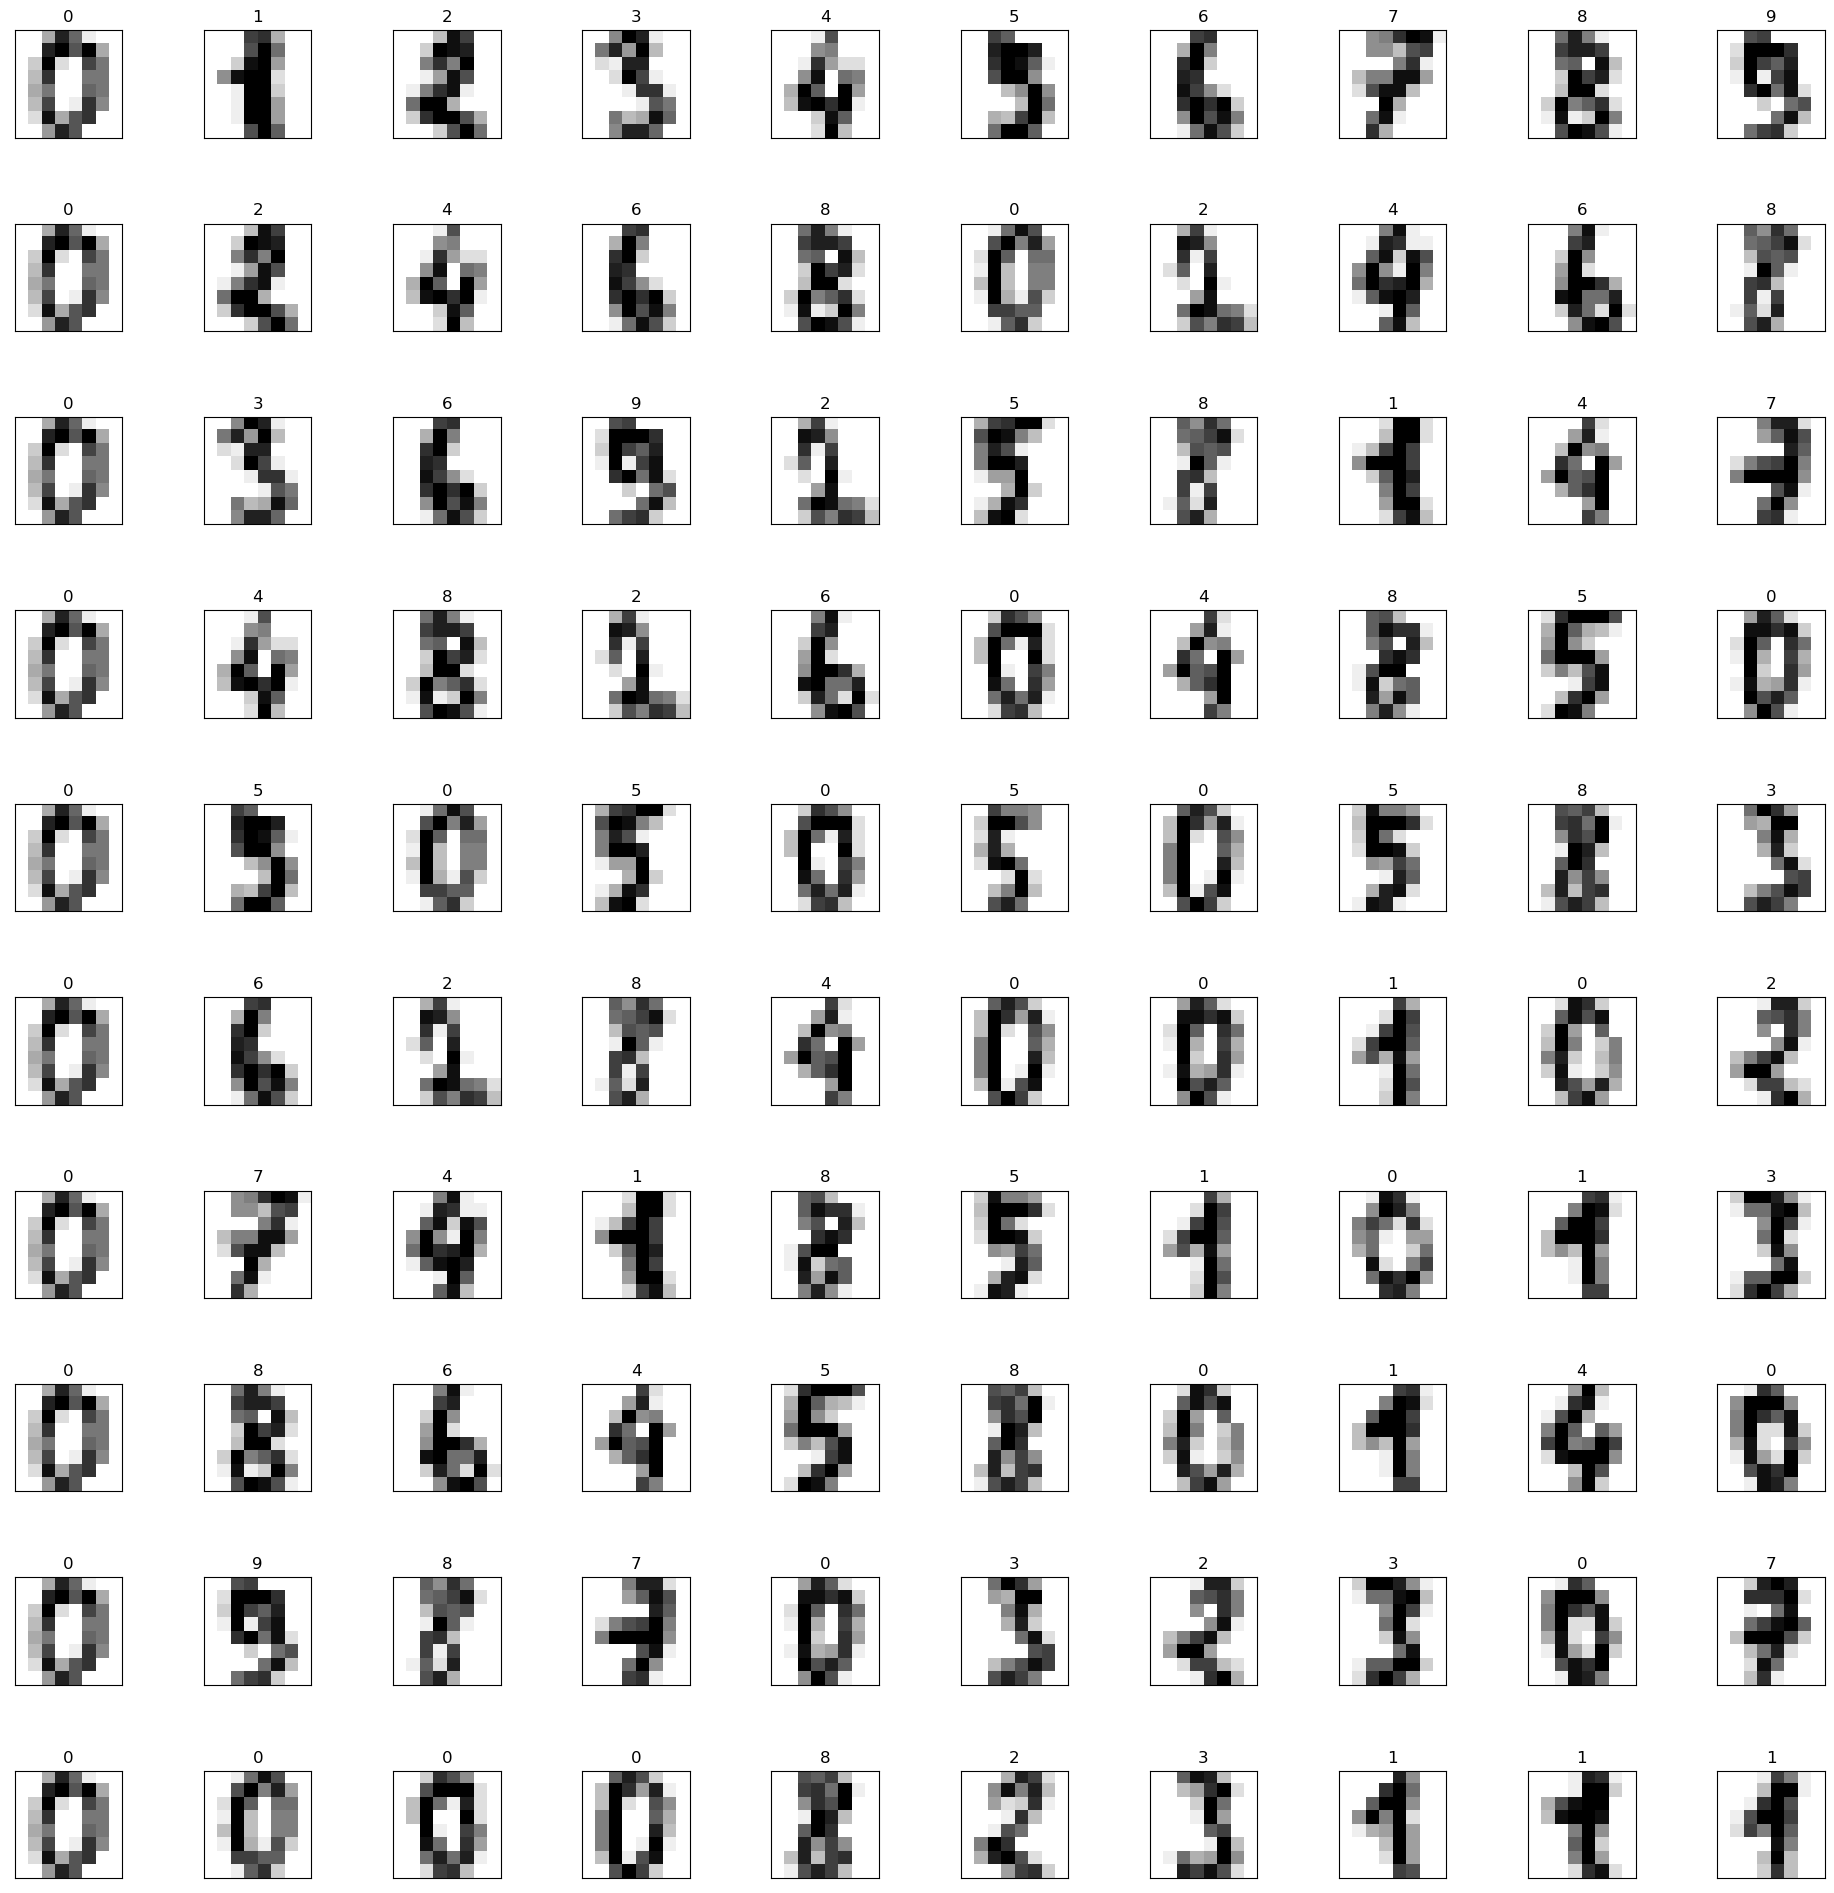

In [17]:
X, y = datasets.load_digits(return_X_y=True)

#X[12].reshape(8,8)
len(X)

nrows = 10
ncols = 10

fig, axs = plt.subplots(nrows,ncols, figsize = (10*cm,10*cm))
fig.subplots_adjust(hspace = 0.8)

for row in range(nrows):
    for col in range(ncols):
        n_pict = row*col + col
        axs[row,col].imshow(X[n_pict].reshape((8,8)),cmap = plt.cm.gray_r, interpolation = 'nearest')
        axs[row,col].xaxis.set_visible(False)
        axs[row,col].yaxis.set_visible(False)
        axs[row,col].set_title(y[n_pict])
fig.show()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

perceptron = Perceptron(max_iter = 100, random_state=0, shuffle=True, fit_intercept=True)
perceptron.fit(X_train,y_train)

y_pred = perceptron.predict(X_test)

perceptron.score(X_test,y_test)

0.9583333333333334

In [23]:
scaler = StandardScaler()
scaler.fit(X)
X_stand = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_stand,y,test_size = 0.2)


perceptron = Perceptron(max_iter=20,eta0=0.01)
perceptron.fit(X_train,y_train)

y_pred = perceptron.predict(X_test)

perceptron.score(X_test,y_test)

# bad_res = [(a,b) for (a,b) in zip(y_test[y_test != y_pred], y_pred[y_test != y_pred]) ]
# good_res = [(a,b) for (a,b) in zip(y_test[y_test == y_pred], y_pred[y_test == y_pred]) ]

# print(len(good_res)/len(y_test))

# print(perceptron.coef_)
# print(perceptron.n_iter_)
# print(perceptron.intercept_)
# print(perceptron.t_)


0.95